In [4]:
import pandas as pd



In [2]:
url="https://raw.githubusercontent.com/shifavk/data-analytic-project/refs/heads/main/imdb_top_1000%20(1).csv"

In [5]:
df=pd.read_csv(url)
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [6]:
df['Gross'] = df['Gross'].astype(str).str.replace(',','').str.replace('$','', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df.dropna(subset=['Gross'], inplace=True)
director_gross = df.groupby('Director')['Gross'].sum()


In [7]:
director_gross = df.groupby('Director')['Gross'].sum()


In [8]:
director_counts = df['Director'].value_counts()
directors_3_or_more = director_counts[director_counts >= 3].index
director_gross_filtered = director_gross[directors_3_or_more]
top10_directors = director_gross_filtered.sort_values(ascending=False).head(10)




In [9]:
import matplotlib.pyplot as plt

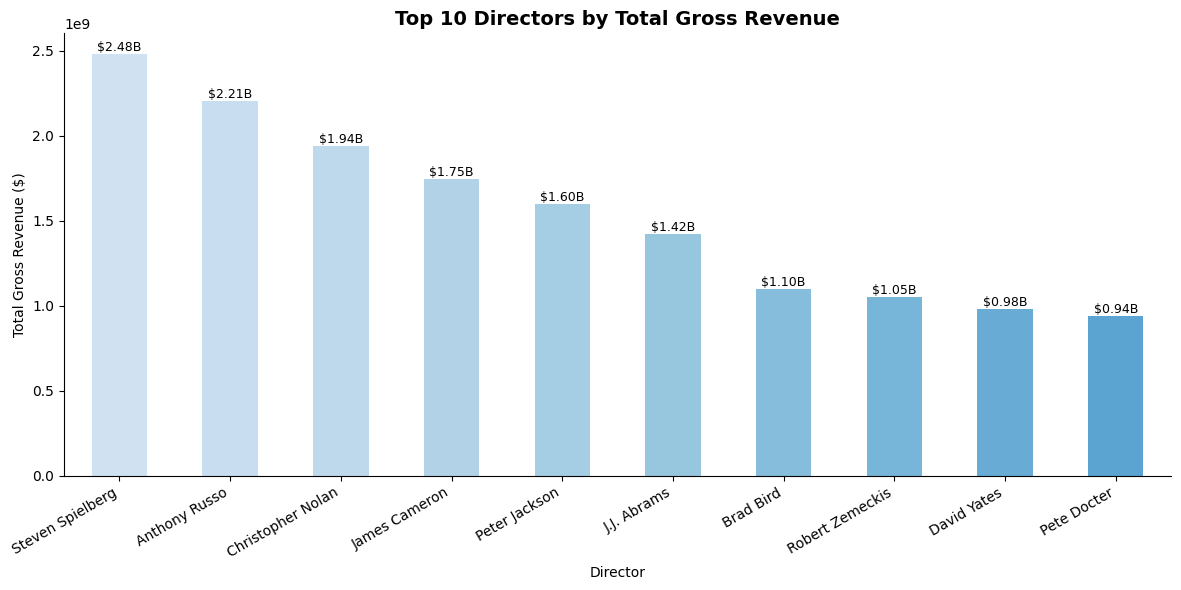

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Sort values (important for storytelling)
top10_directors_sorted = top10_directors.sort_values(ascending=False)

# Plot with gradient-like color
bars = top10_directors_sorted.plot(
    kind='bar',
    color=plt.cm.Blues(range(50, 50 + len(top10_directors_sorted)*10, 10))
)

# Titles
plt.title("Top 10 Directors by Total Gross Revenue", fontsize=14, weight='bold')
plt.xlabel("Director")
plt.ylabel("Total Gross Revenue ($)")

# Rotate labels
plt.xticks(rotation=30, ha='right')

# Add value labels on bars
for i, value in enumerate(top10_directors_sorted):
    plt.text(
        i,
        value,
        f"${value/1e9:.2f}B",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Remove unnecessary borders
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


In [11]:
df['Genre'] = df['Genre'].str.split(', ')
df_exploded = df.explode('Genre')


In [12]:
genre_stats = df_exploded.groupby('Genre').agg(
    Avg_Rating=('IMDB_Rating', 'mean'),
    Avg_Gross=('Gross', 'mean'),
    Movie_Count=('Genre', 'count')
).reset_index()


In [13]:
genre_stats = genre_stats[genre_stats['Movie_Count'] >= 10]


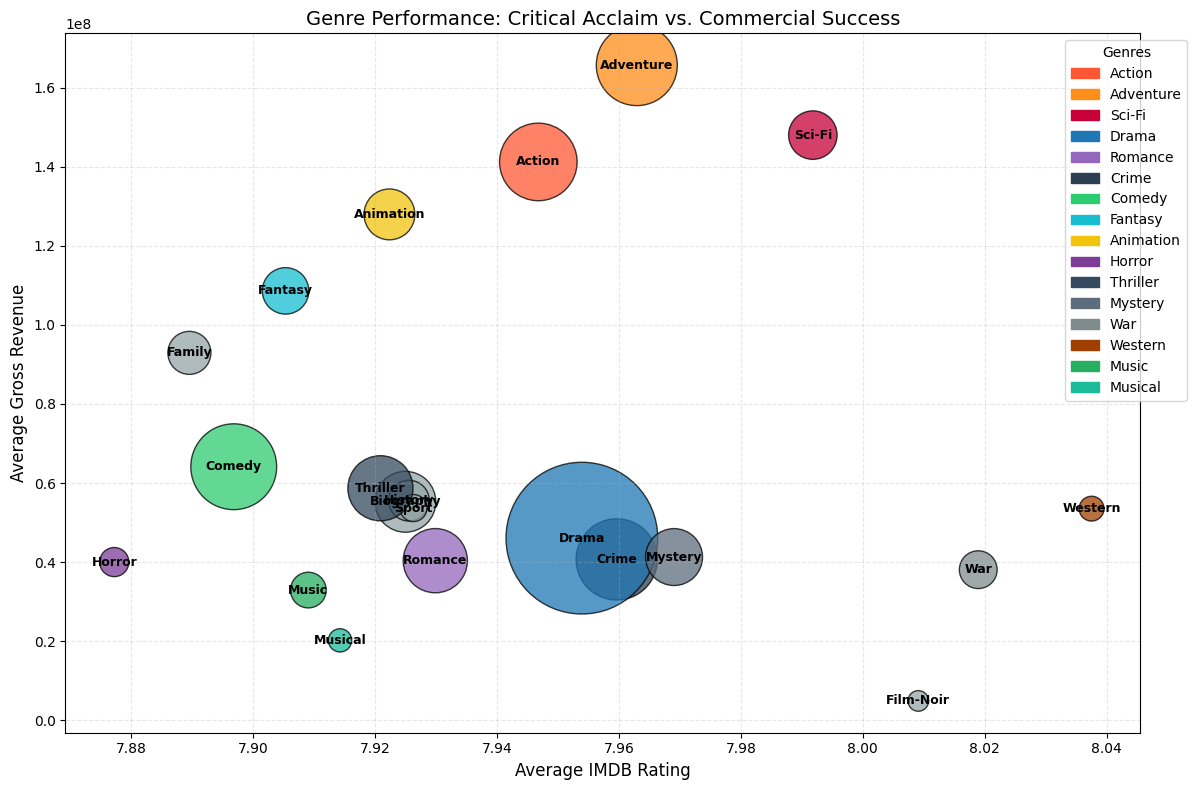

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# -----------------------------
# COLOR MAP FOR GENRES
# -----------------------------
genre_colors = {
    'Action': '#FF5733',
    'Adventure': '#FF8D1A',
    'Sci-Fi': '#C70039',
    'Drama': '#1F77B4',
    'Romance': '#9467BD',
    'Crime': '#2C3E50',
    'Comedy': '#2ECC71',
    'Fantasy': '#17BECF',
    'Animation': '#F1C40F',
    'Horror': '#7D3C98',
    'Thriller': '#34495E',
    'Mystery': '#5D6D7E',
    'War': '#7F8C8D',
    'Western': '#A04000',
    'Music': '#27AE60',
    'Musical': '#1ABC9C'
}

# -----------------------------
# MAP COLORS SAFELY
# -----------------------------
colors = genre_stats['Genre'].map(genre_colors).fillna('#95A5A6')

# -----------------------------
# PLOT
# -----------------------------
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    genre_stats['Avg_Rating'],
    genre_stats['Avg_Gross'],
    s=genre_stats['Movie_Count'] * 20,  # bubble size proportional to movie count
    c=colors,
    alpha=0.75,
    edgecolors='black'
)

# -----------------------------
# LABELS ON BUBBLES
# -----------------------------
for i, genre in enumerate(genre_stats['Genre']):
    plt.text(
        genre_stats['Avg_Rating'].iloc[i],
        genre_stats['Avg_Gross'].iloc[i],
        genre,
        fontsize=9,
        weight='bold',
        ha='center',
        va='center'
    )

# -----------------------------
# AXIS LABELS & TITLE
# -----------------------------
plt.xlabel("Average IMDB Rating", fontsize=12)
plt.ylabel("Average Gross Revenue", fontsize=12)
plt.title("Genre Performance: Critical Acclaim vs. Commercial Success", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)

# -----------------------------
# OPTIONAL: LEGEND FOR GENRE COLORS
# -----------------------------
patches = [mpatches.Patch(color=c, label=g) for g, c in genre_colors.items()]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), title='Genres')

plt.tight_layout()
plt.show()
